##Downloading Dataset From Kaggle And Copy it to GoogleDrive

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas
od.download('https://www.kaggle.com/competitions/tabular-playground-series-jul-2021/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pakdel1991
Your Kaggle Key: ··········


100%|██████████| 264k/264k [00:00<00:00, 17.7MB/s]


Extracting archive ./tabular-playground-series-jul-2021/tabular-playground-series-jul-2021.zip to ./tabular-playground-series-jul-2021


In [ ]:
%cp -r /content/tabular-playground-series-jul-2021 /content/drive/MyDrive/Datasets/Kaggle-Datasets

# OOP

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook rfpimp
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 13.6 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
from fastbook import *
import pathlib
from fastai.tabular.all import *

## Reading and Prepairing Data

In [ ]:
path=pathlib.Path('/content/gdrive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021')
df=pd.read_csv(path/'train.csv')
df_test=pd.read_csv(path/'test.csv')
print(df.columns)
print('Test columns',df_test.columns)

Index(['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'],
      dtype='object')
Test columns Index(['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5'],
      dtype='object')


In [ ]:
dep_var='target_carbon_monoxide'
df[dep_var]=np.log(df[dep_var]+1)
df=add_datepart(df,'date_time')
df_test=add_datepart(df_test,'date_time')
df=df.drop(['target_benzene','target_nitrogen_oxides'],axis=1)
print(df.columns)

Index(['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'date_timeYear', 'date_timeMonth',
       'date_timeWeek', 'date_timeDay', 'date_timeDayofweek',
       'date_timeDayofyear', 'date_timeIs_month_end',
       'date_timeIs_month_start', 'date_timeIs_quarter_end',
       'date_timeIs_quarter_start', 'date_timeIs_year_end',
       'date_timeIs_year_start', 'date_timeElapsed'],
      dtype='object')


In [ ]:
cond=(df.date_timeYear==2010) & (df.date_timeMonth<12)
train_idx=np.where( cond)[0]
valid_idx=np.where(~cond)[0]
splist=(list(train_idx),list(valid_idx))
cont,cat=cont_cat_split(df,100,dep_var)
procs=[Categorify,FillMissing,Normalize]
to=TabularPandas(df,procs,cat, cont,y_names=dep_var,splits=splist,y_block=RegressionBlock())
xs,y=to.train.xs,to.train.y.ravel()
valid_xs,valid_y=to.valid.xs,to.valid.y.ravel()
len(y),len(valid_y)

(6366, 745)

In [ ]:
print(df.nunique())
df.isnull().sum()

deg_C                         408
relative_humidity             762
absolute_humidity            5451
sensor_1                     3882
sensor_2                     4254
sensor_3                     4251
sensor_4                     4655
sensor_5                     4839
target_carbon_monoxide         95
date_timeYear                   2
date_timeMonth                 11
date_timeWeek                  43
date_timeDay                   31
date_timeDayofweek              7
date_timeDayofyear            298
date_timeIs_month_end           2
date_timeIs_month_start         2
date_timeIs_quarter_end         2
date_timeIs_quarter_start       2
date_timeIs_year_end            2
date_timeIs_year_start          2
date_timeElapsed             7111
dtype: int64


deg_C                        0
relative_humidity            0
absolute_humidity            0
sensor_1                     0
sensor_2                     0
sensor_3                     0
sensor_4                     0
sensor_5                     0
target_carbon_monoxide       0
date_timeYear                0
date_timeMonth               0
date_timeWeek                0
date_timeDay                 0
date_timeDayofweek           0
date_timeDayofyear           0
date_timeIs_month_end        0
date_timeIs_month_start      0
date_timeIs_quarter_end      0
date_timeIs_quarter_start    0
date_timeIs_year_end         0
date_timeIs_year_start       0
date_timeElapsed             0
dtype: int64

In [ ]:
to.classes

In [ ]:
to.items.head()

##Modeling and Predicting

In [ ]:
%cd /content/gdrive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/Project_fastai

/content/gdrive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/Project_fastai


### RandomForest

train>>>
mse:   0.116533
accuracy:   0.883467
valid>>>
mse:   0.289859
accuracy:   0.710141


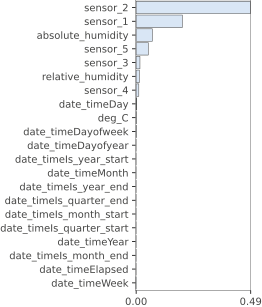

In [ ]:
m1=Randomforest(n_estimators=40, min_samples_leaf=15,
        max_samples=1500, max_features=0.5, n_jobs=-1, oob_score=True)
forest_preds=implement(m1,to)
m1.importance(valid_xs,to.valid.y)

###XGBoost

[20:32:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train>>>
mse:   0.067474
accuracy:   0.932526
valid>>>
mse:   0.33024
accuracy:   0.66976


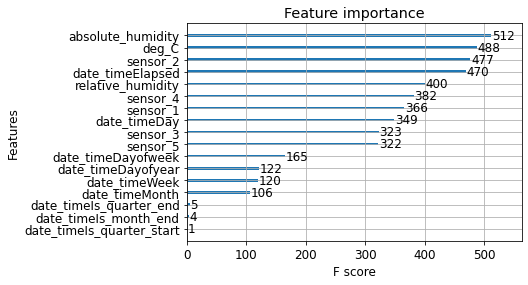

In [ ]:
m2=xgbreg(n_estimators=100,learning_rate = .1,max_depth = 6,n_jobs = -1,
      early_stopping_rounds=10,subsample=0.5)
xgb_preds=implement(m2,to)
m2.importance()

###Neural Netwoks

TabularModel (Input shape: 64 x 11)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 2              
Embedding                                 4          True      
____________________________________________________________________________
                     64 x 6              
Embedding                                 60         True      
____________________________________________________________________________
                     64 x 13             
Embedding                                 520        True      
____________________________________________________________________________
                     64 x 11             
Embedding                                 352        True      
____________________________________________________________________________
                     64 x 5              
Embedding                                 40         True      
______________________________________________________________

SuggestedLRs(valley=0.001737800776027143)

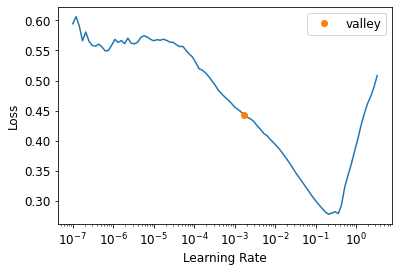

In [ ]:
m3=NN(to)
print(m3.learn.summary())
m3.learn.lr_find()

epoch,train_loss,valid_loss,_rmse,time
0,0.213086,0.224942,0.474280,00:01
1,0.145501,0.201007,0.448338,00:01
2,0.076507,0.093799,0.306267,00:01
3,0.035578,0.060543,0.246055,00:01
4,0.022677,0.085153,0.291810,00:01
5,0.023709,0.071757,0.267876,00:01
6,0.020704,0.058296,0.241445,00:01
7,0.020039,0.101332,0.318326,00:01
8,0.019911,0.109090,0.330288,00:01
9,0.019367,0.114272,0.338042,00:01


Better model found at epoch 0 with _rmse value: 0.47428011894226074.
Better model found at epoch 1 with _rmse value: 0.4483383297920227.
Better model found at epoch 2 with _rmse value: 0.3062669336795807.
Better model found at epoch 3 with _rmse value: 0.24605482816696167.
Better model found at epoch 6 with _rmse value: 0.24144500494003296.
Getting base error


Calculating Permutation Importance


(#2) [0.058295682072639465,0.24144500494003296]

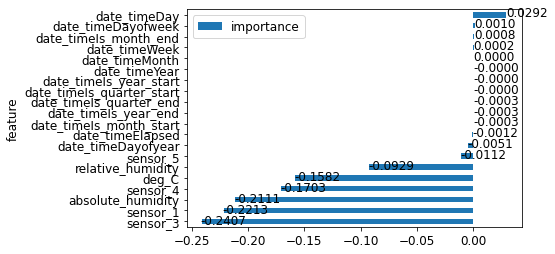

In [ ]:
m3.train(lr=3e-3)
m3.importance()
NN_preds=m3.predict()
m3.learn.validate()

In [ ]:
path='/content/gdrive/MyDrive/Datasets/Kaggle-Datasets/tabular-playground-series-jul-2021/Project_fastai/models/nnlearner'
my_learn=NN(to)
model=my_learn.learn.load(path)


In [ ]:
model.validate()

(#2) [0.058295682072639465,0.24144500494003296]

## Ensembling

In [ ]:
forest_preds.shape,xgb_preds.shape,NN_preds.squeeze().numpy().shape

((745,), (745,), (745,))

In [ ]:
avgs=(forest_preds+xgb_preds)/2
r_mse(avgs,valid_y)

0.305166

In [46]:
avgs=(forest_preds+xgb_preds+NN_preds.squeeze().numpy())/3
r_mse(avgs,valid_y)

0.266393